In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import pygplates
# import pmagpy.ipmag as ipmag
# import pmagpy.pmag as pmag
# import pmagpy.contribution_builder as cb
# from pmagpy import convert_2_magic as convert
# import pmagpy.pmagplotlib as pmagplotlib
# import cartopy.crs as ccrs
# from shapely.geometry import Point, Polygon
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# import cartopy.mpl.geoaxes
# import os
# import math
import sys
sys.path.insert(1,'/Users/lei/Documents/GitHub/GPlatesReconstructionModel')
# sys.path.append('/Users/lei/Documents/GitHub/GPlatesReconstructionModel')
from gprm import ReconstructionModel

%matplotlib inline
sys.path.insert(1, '/Users/lei/Documents/GitHub/pmag')
sys.path.insert(1, '/Users/lei/Desktop/Projects/Manuscripts/Trans-Iapetus/Data')
from apwp_utils_LW import *
from plot_pole_recon import *
from plot_trans_iapetus import *
from utils_ed import *
%load_ext autoreload
%autoreload 2

pd.set_option('display.max_rows', None,'display.max_columns', None)

/Users/lei/Documents/GitHub/GPlatesReconstructionModel/gprm/GPlatesReconstructionModel.py:56: UserWarning: web service options not available
  warnings.warn('web service options not available')


#### Load the paleomagnetic data from Evans et al. (2021)

In [2]:
df_Apoles = select_Evans_poles(Evans_category='Apoles', age_interval=[500, 650])
df_Bpoles = select_Evans_poles(Evans_category='Bpoles', age_interval=[500, 650])
print(df_Apoles.Craton.unique(), df_Bpoles.Craton.unique())

df_AB = pd.concat([df_Apoles, df_Bpoles]).sort_values(by=['Craton', 'Category', 'Max'])
df_AB['Antipole'] = int(0)
df_AB.head(2)

['Baltica' 'Congo' 'Rio de la Plata'] ['Baltica' 'Congo' 'India' 'Laurentia' 'Rio de la Plata' 'West Africa']


,Craton,Rockname_component,GPMDB_result#,SLAT,SLONG,PLAT,PLONG,A95,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q,R1,R2,R3,R4,R5,R6,R7,R,Nominal_age,Min,Max,Reference (separate age ref when that antedates the most recent pmag study),Year,Category,Reference,"Principal_shortcoming (with narrative if Q1,2,4,5 all satisfied)",Antipole
21,Baltica,Kurgashlya formation,9536,53.3,57.5,50.9,314.5,5.3,1,1,1,0,1,1,1,6,1.0,1.0,1.0,0,1.0,1.0,1.0,6.0,565,560,570,Lubnina et al. (age estimated only),2014,A,NaN,NaN,0
22,Baltica,Bakeevo formation,9537,54.9,58.2,42.3,299.1,5.3,1,1,1,g,1,1,1,7,1.0,1.0,1.0,g,1.0,1.0,1.0,7.0,565,560,570,Lubnina et al. (age estimated only),2014,Aq4,NaN,NaN,0


##### Plot the age distribution of the Ediacaran data

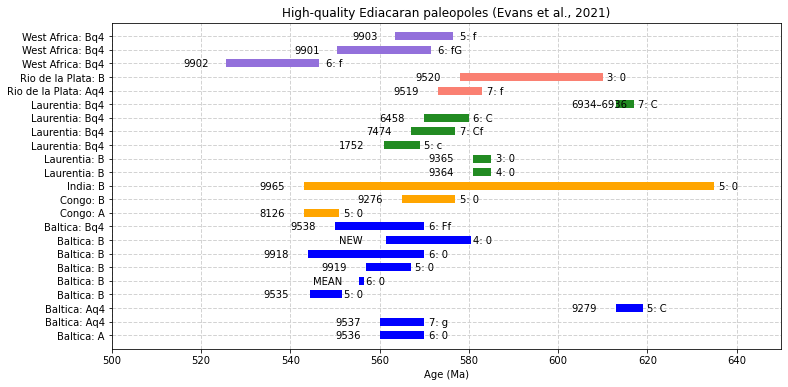

In [18]:
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(111)
j, k = 0, 0

for i, row in df_AB.iterrows():
    if row.Craton == 'Amazonia': bcolor = 'c' # 'Baltica', 'Congo', 'Rio de la Plata', 'India', 'Laurentia', 'West Africa'
    elif row.Craton == 'Baltica': bcolor = 'b'
    elif row.Craton == 'Laurentia': bcolor = 'forestgreen'
    elif row.Craton == 'Rio de la Plata': bcolor = 'salmon'
    elif row.Craton == 'Congo': bcolor = 'orange'
    elif row.Craton == 'West Africa': bcolor = 'mediumpurple'
    plt.errorbar(row.Nominal_age, j+1, yerr=0, xerr=(row.Max-row.Min)/2, color=bcolor, ecolor=None, elinewidth=8, capsize=0, capthick=0, ls='none', label=None)
    j += 1
for i, row in df_AB.iterrows():
    plt.annotate(f"{row.Q}: {row.Q4}", (row.Max+1, k+.75))
    plt.annotate(f"{row['GPMDB_result#']}", (row.Min-10, k+.75))
    k += 1

label_all = []
for i in (df_AB.Craton + ': ' + df_AB.Category).tolist(): label_all.append(i) 
plt.yticks(ticks=np.arange(1,len(df_AB)+1), labels=label_all);
ax1.set_xlim(500, 650)
ax1.set_ylim(0, len(df_AB)+1)
plt.xlabel('Age (Ma)')
plt.grid(color='lightgrey', linestyle='--', linewidth=1) # plt.grid(True)
plt.title('High-quality Ediacaran paleopoles (Evans et al., 2021)');
# plt.savefig('/Users/lei/Desktop/Projects/Manuscripts/Coauthored_MS/2021_Avalon/pmag_Pannotia/PolesAB_ages.pdf')

In [4]:
gdf_E21_Ama_R21, gdf_E21_balt_R21, gdf_E21_lau_R21, gdf_E21_RDLPlata_R21, gdf_E21_SF_Con_R21, gdf_E21_waf_R21 = create_gdf(df_Apoles, df_Bpoles, mname='R21', anchor_id=1, save_flagn=0)
gdf_E21_Ama_M21, gdf_E21_balt_M21, gdf_E21_lau_M21, gdf_E21_RDLPlata_M21, gdf_E21_SF_Con_M21, gdf_E21_waf_M21 = create_gdf(df_Apoles, df_Bpoles, mname='M21', anchor_id=1, save_flagn=0)
gdf_E21_Ama_M17, gdf_E21_balt_M17, gdf_E21_lau_M17, gdf_E21_RDLPlata_M17, gdf_E21_SF_Con_M17, gdf_E21_waf_M17 = create_gdf(df_Apoles, df_Bpoles, mname='M17', anchor_id=0, save_flagn=0)
gdf_E21_Ama_S21, gdf_E21_balt_S21, gdf_E21_lau_S21, gdf_E21_RDLPlata_S21, gdf_E21_SF_Con_S21, gdf_E21_waf_S21 = create_gdf(df_Apoles, df_Bpoles, mname='S21', anchor_id=1, save_flagn=0)
gdf_E21_Ama_L08, gdf_E21_balt_L08, gdf_E21_lau_L08, gdf_E21_RDLPlata_L08, gdf_E21_SF_Con_L08, gdf_E21_waf_L08 = create_gdf(df_Apoles, df_Bpoles, mname='L08', anchor_id=0, save_flagn=0)
gdf_E21_Ama_TC16, gdf_E21_balt_TC16, gdf_E21_lau_TC16, gdf_E21_RDLPlata_TC16, gdf_E21_SF_Con_TC16, gdf_E21_waf_TC16 = create_gdf(df_Apoles, df_Bpoles, mname='TC16', anchor_id=1, save_flagn=0)

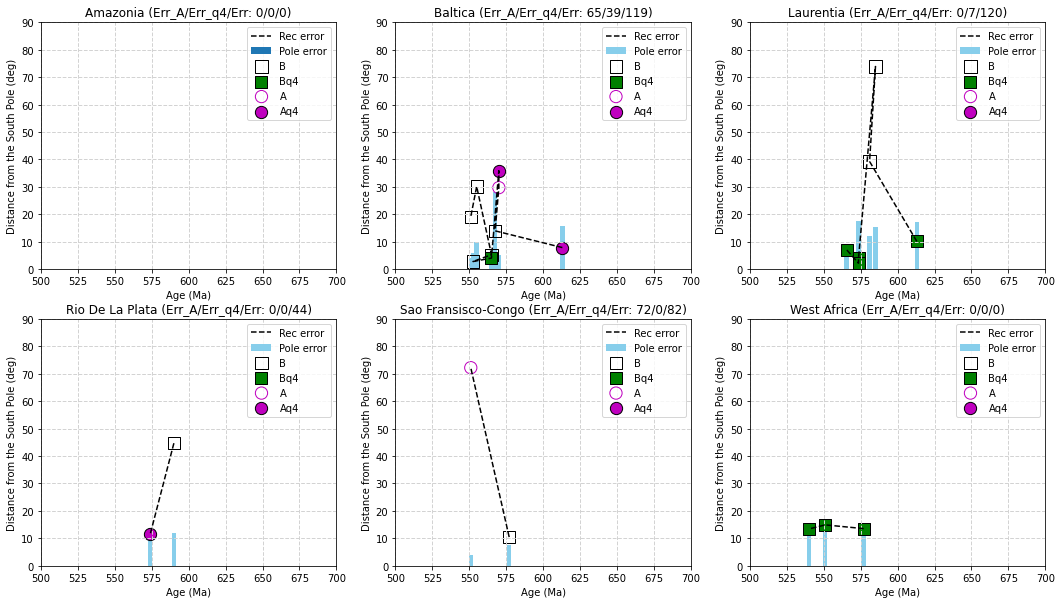

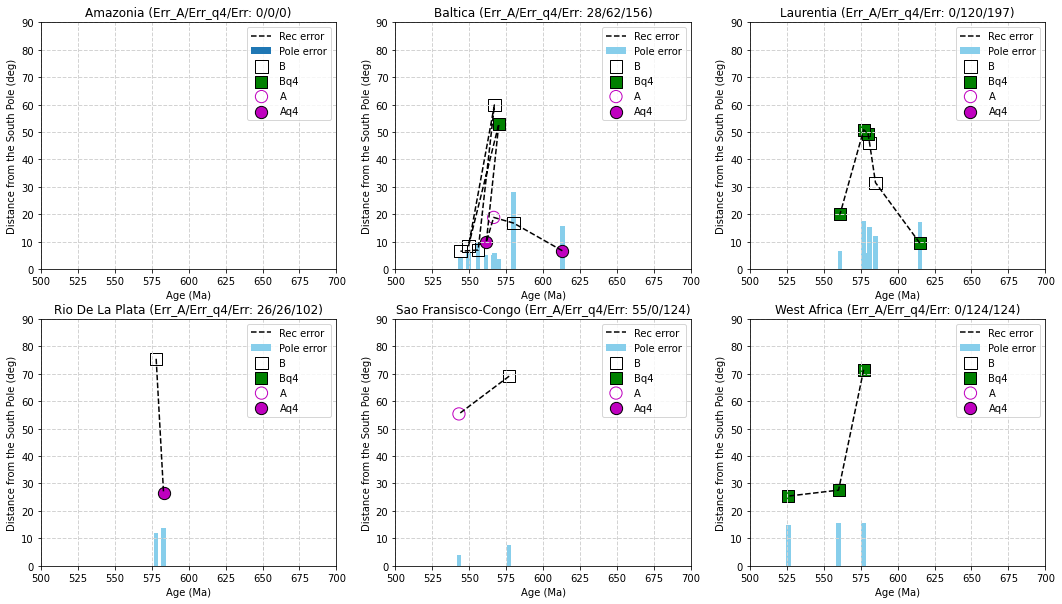

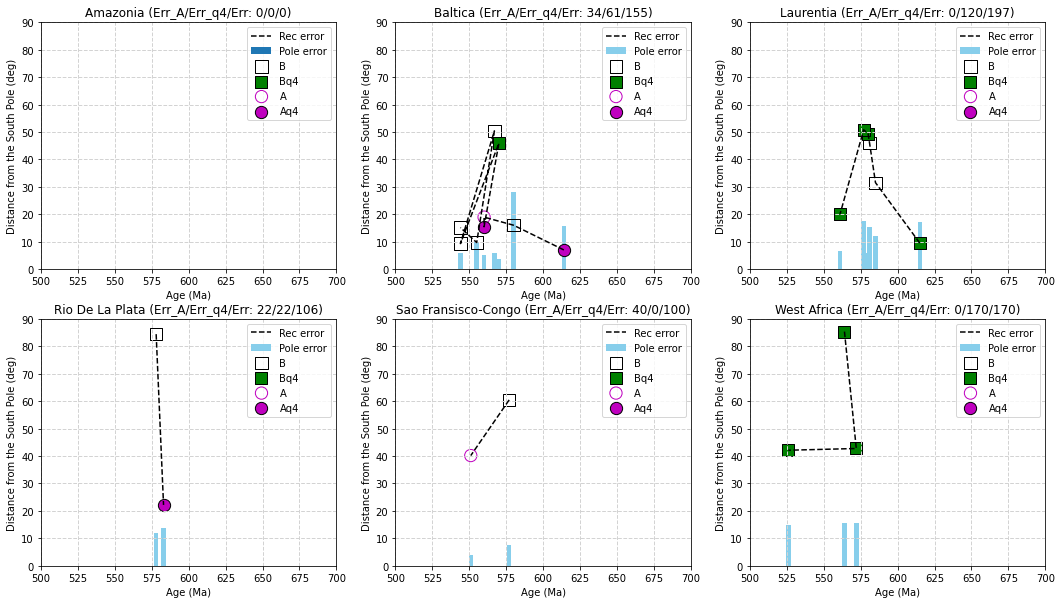

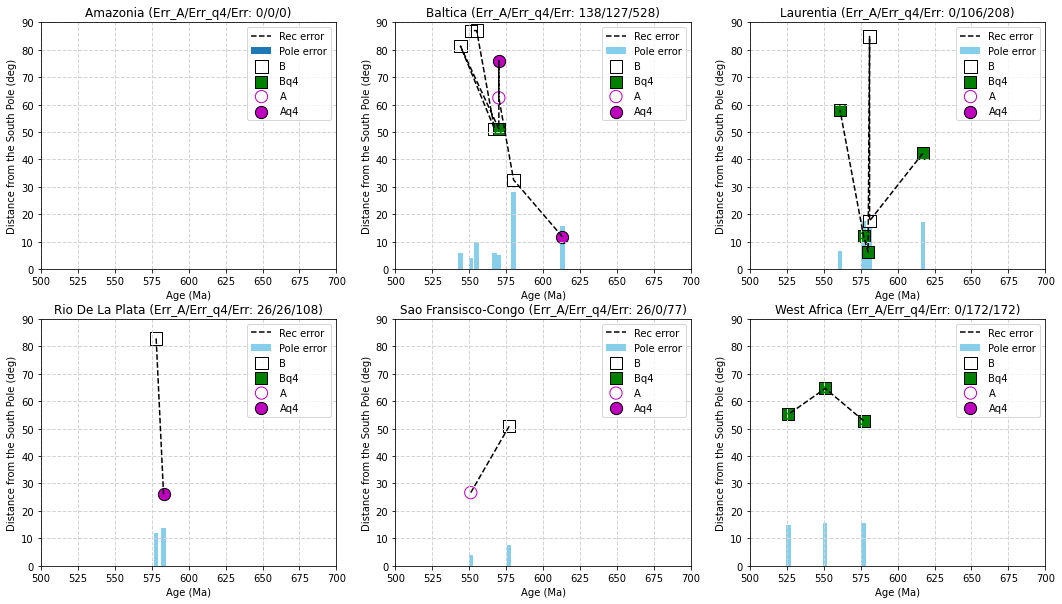

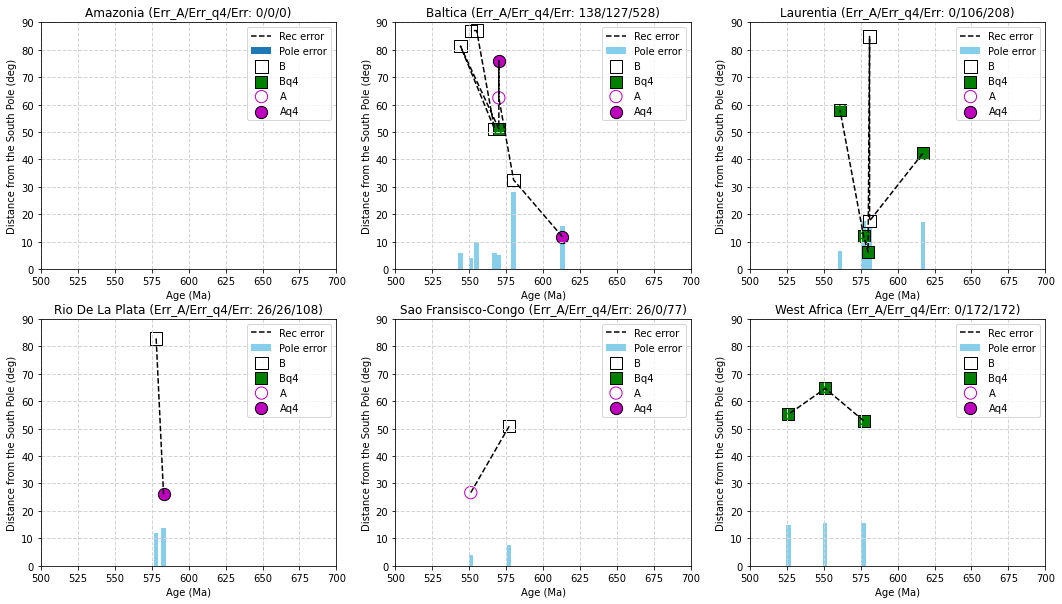

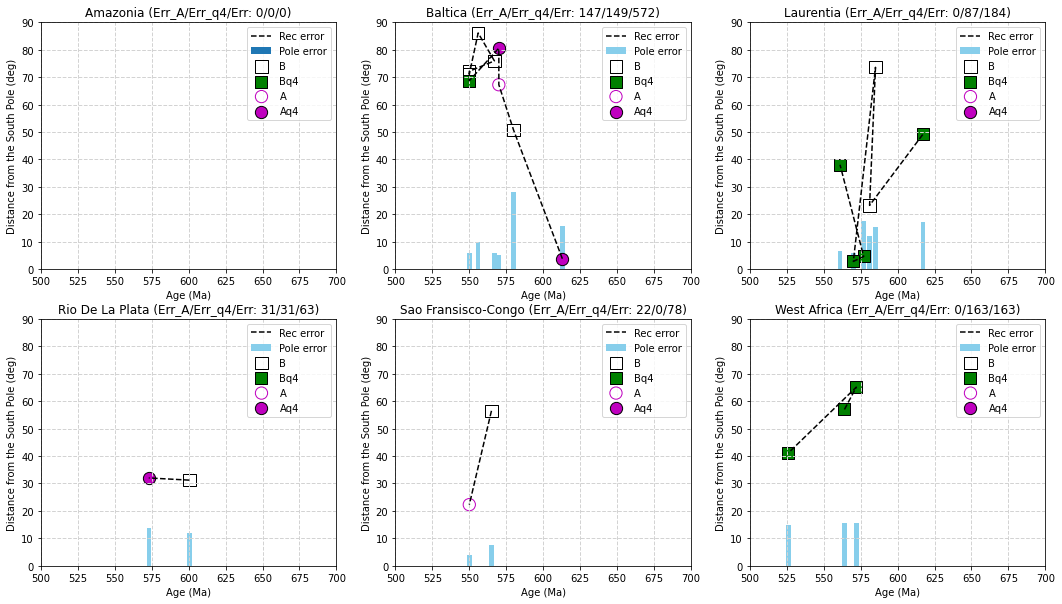

In [5]:
plot_pole_rec_err_E21_all(gdf_E21_Ama_R21, gdf_E21_balt_R21, gdf_E21_lau_R21, gdf_E21_RDLPlata_R21, gdf_E21_SF_Con_R21, gdf_E21_waf_R21, MinRec0='Y')
plot_pole_rec_err_E21_all(gdf_E21_Ama_M21, gdf_E21_balt_M21, gdf_E21_lau_M21, gdf_E21_RDLPlata_M21, gdf_E21_SF_Con_M21, gdf_E21_waf_M21, MinRec0='Y')
plot_pole_rec_err_E21_all(gdf_E21_Ama_M17, gdf_E21_balt_M17, gdf_E21_lau_M17, gdf_E21_RDLPlata_M17, gdf_E21_SF_Con_M17, gdf_E21_waf_M17, MinRec0='Y')
plot_pole_rec_err_E21_all(gdf_E21_Ama_S21, gdf_E21_balt_S21, gdf_E21_lau_S21, gdf_E21_RDLPlata_S21, gdf_E21_SF_Con_S21, gdf_E21_waf_S21, MinRec0='Y')
plot_pole_rec_err_E21_all(gdf_E21_Ama_S21, gdf_E21_balt_S21, gdf_E21_lau_S21, gdf_E21_RDLPlata_S21, gdf_E21_SF_Con_S21, gdf_E21_waf_S21, MinRec0='Y')
plot_pole_rec_err_E21_all(gdf_E21_Ama_TC16, gdf_E21_balt_TC16, gdf_E21_lau_TC16, gdf_E21_RDLPlata_TC16, gdf_E21_SF_Con_TC16, gdf_E21_waf_TC16, MinRec0='Y')

In [7]:
gdf_E21_balt_R21['craton'], gdf_E21_lau_R21['craton'], gdf_E21_RDLPlata_R21['craton'], gdf_E21_SF_Con_R21['craton'], gdf_E21_waf_R21['craton'] = 'Baltica','Laurentia','Rio','Congo','W.Africa'
gdf_E21_balt_M21['craton'], gdf_E21_lau_M21['craton'], gdf_E21_RDLPlata_M21['craton'], gdf_E21_SF_Con_M21['craton'], gdf_E21_waf_M21['craton'] = 'Baltica','Laurentia','Rio','Congo','W.Africa'
gdf_E21_balt_M17['craton'], gdf_E21_lau_M17['craton'], gdf_E21_RDLPlata_M17['craton'], gdf_E21_SF_Con_M17['craton'], gdf_E21_waf_M17['craton'] = 'Baltica','Laurentia','Rio','Congo','W.Africa'
gdf_E21_balt_S21['craton'], gdf_E21_lau_S21['craton'], gdf_E21_RDLPlata_S21['craton'], gdf_E21_SF_Con_S21['craton'], gdf_E21_waf_S21['craton'] = 'Baltica','Laurentia','Rio','Congo','W.Africa'
gdf_E21_balt_L08['craton'], gdf_E21_lau_L08['craton'], gdf_E21_RDLPlata_L08['craton'], gdf_E21_SF_Con_L08['craton'], gdf_E21_waf_L08['craton'] = 'Baltica','Laurentia','Rio','Congo','W.Africa'
gdf_E21_balt_TC16['craton'], gdf_E21_lau_TC16['craton'], gdf_E21_RDLPlata_TC16['craton'], gdf_E21_SF_Con_TC16['craton'], gdf_E21_waf_TC16['craton'] = 'Baltica','Laurentia','Rio','Congo','W.Africa'
R21_cat = pd.concat([gdf_E21_Ama_R21, gdf_E21_balt_R21, gdf_E21_lau_R21, gdf_E21_RDLPlata_R21, gdf_E21_SF_Con_R21, gdf_E21_waf_R21])
M21_cat = pd.concat([gdf_E21_Ama_M21, gdf_E21_balt_M21, gdf_E21_lau_M21, gdf_E21_RDLPlata_M21, gdf_E21_SF_Con_M21, gdf_E21_waf_M21])
M17_cat = pd.concat([gdf_E21_Ama_M17, gdf_E21_balt_M17, gdf_E21_lau_M17, gdf_E21_RDLPlata_M17, gdf_E21_SF_Con_M17, gdf_E21_waf_M17])
S21_cat = pd.concat([gdf_E21_Ama_S21, gdf_E21_balt_S21, gdf_E21_lau_S21, gdf_E21_RDLPlata_S21, gdf_E21_SF_Con_S21, gdf_E21_waf_S21])
L08_cat = pd.concat([gdf_E21_Ama_L08, gdf_E21_balt_L08, gdf_E21_lau_L08, gdf_E21_RDLPlata_L08, gdf_E21_SF_Con_L08, gdf_E21_waf_L08])
TC16_cat = pd.concat([gdf_E21_Ama_TC16, gdf_E21_balt_TC16, gdf_E21_lau_TC16, gdf_E21_RDLPlata_TC16, gdf_E21_SF_Con_TC16, gdf_E21_waf_TC16])
R21_cat['model'],M21_cat['model'],M17_cat['model'],S21_cat['model'],L08_cat['model'],TC16_cat['model'] = 'R21', 'M21', 'M17', 'S21', 'L08', 'TC16'

R21_catQ4 = R21_cat[(R21_cat['Category'] == 'Aq4') | (R21_cat['Category'] == 'Bq4')]
M21_catQ4 = M21_cat[(M21_cat['Category'] == 'Aq4') | (M21_cat['Category'] == 'Bq4')]
M17_catQ4 = M17_cat[(M17_cat['Category'] == 'Aq4') | (M17_cat['Category'] == 'Bq4')]
S21_catQ4 = S21_cat[(S21_cat['Category'] == 'Aq4') | (S21_cat['Category'] == 'Bq4')]
L08_catQ4 = L08_cat[(L08_cat['Category'] == 'Aq4') | (L08_cat['Category'] == 'Bq4')]
TC16_catQ4 = TC16_cat[(TC16_cat['Category'] == 'Aq4') | (TC16_cat['Category'] == 'Bq4')]

models_cat = pd.concat([R21_cat,M21_cat,M17_cat,S21_cat,L08_cat,TC16_cat]).reset_index()
models_cat['bias'], models_cat['biasA'], models_cat['biasp'], models_cat['Q4YN'], models_cat['grade'] = np.nan, np.nan, np.nan, '', ''
models_cat['bias'] = models_cat['RecEMin'] - models_cat['poleA95']
models_cat['biasp'] = models_cat['bias'] 
models_cat.loc[models_cat.bias<0, 'biasp'] = 0
models_cat['biasA'] = np.absolute(np.array(models_cat['bias'].tolist()))
models_cat.loc[models_cat.bias<0, 'craton'] = 'InErr'
models_cat.loc[(models_cat.Category=='Aq4') | (models_cat.Category=='Bq4'), 'Q4YN'] = 'Q4Y'
models_cat.loc[(models_cat.Category=='A') | (models_cat.Category=='B'), 'Q4YN'] = 'Q4N'
models_cat.loc[(models_cat.Category=='Aq4') | (models_cat.Category=='A'), 'grade'] = 'A-grade'
models_cat.loc[(models_cat.Category=='Bq4') | (models_cat.Category=='B'), 'grade'] = 'B-grade'
# models_cat = models_cat.reset_index()
models_catbias = models_cat[models_cat['RecEMin'] > models_cat['poleA95']]
models_catbiasno = models_cat[models_cat['RecEMin'] <= models_cat['poleA95']]
models_catQ4 = models_cat[(models_cat['Category'] == 'Aq4') | (models_cat['Category'] == 'Bq4')]
models_catQ4bias = models_catQ4[models_catQ4['RecEMin'] > models_catQ4['poleA95']]
models_catQ4biasno = models_catQ4[models_catQ4['RecEMin'] <= models_catQ4['poleA95']]
models_cat.columns

Index(['index', 'name', 'Category', 'Plon', 'Plat', 'poleA95', 'FROMAGE',
       'TOAGE', 'plateid', 'Rlon', 'Rlat', 'RecE', 'RecEAge', 'RlonMin',
       'RlatMin', 'RecEMin', 'RecEMinAge', 'Coordinates', 'GPMDB_result#',
       'craton', 'model', 'bias', 'biasA', 'biasp', 'Q4YN', 'grade'],
      dtype='object')

In [9]:
for mname in ['R21', 'M21', 'M17', 'S21', 'L08', 'TC16']:
    if mname == 'M21':
        fig = px.sunburst(models_cat[models_cat.model==mname], path=['model','craton','Q4YN','Category','GPMDB_result#'], values='biasp', hover_data=['FROMAGE','TOAGE', 'RecEMinAge','RecEMin','poleA95'],color_discrete_sequence=["green","blue", "orange", "mediumpurple", "salmon"])
    elif mname == 'M17':
        fig = px.sunburst(models_cat[models_cat.model==mname], path=['model','craton','Q4YN','Category','GPMDB_result#'], values='biasp', hover_data=['FROMAGE','TOAGE', 'RecEMinAge','RecEMin','poleA95'],color_discrete_sequence=["green","blue",  "mediumpurple", "orange","salmon"])
    elif mname == 'L08' or mname == 'R21':
        fig = px.sunburst(models_cat[models_cat.model==mname], path=['model','craton','Q4YN','Category','GPMDB_result#'], values='biasp', hover_data=['FROMAGE','TOAGE', 'RecEMinAge','RecEMin','poleA95'],color_discrete_sequence=["blue", "green","orange","salmon", "mediumpurple"])
    elif mname == 'S21':
        fig = px.sunburst(models_cat[models_cat.model==mname], path=['model','craton','Q4YN','Category','GPMDB_result#'], values='biasp', hover_data=['FROMAGE','TOAGE', 'RecEMinAge','RecEMin','poleA95'],color_discrete_sequence=["blue", "green","mediumpurple","salmon", "orange"])
    else:
        fig = px.sunburst(models_cat[models_cat.model==mname], path=['model','craton','Q4YN','Category','GPMDB_result#'], values='biasp', hover_data=['FROMAGE','TOAGE', 'RecEMinAge','RecEMin','poleA95'],color_discrete_sequence=["blue", "green","mediumpurple", "orange","salmon"])
    fig.update_layout(uniformtext=dict(minsize=9))
    fig.update_traces(opacity=0.6)
    fig.show()

    # fig.write_image(f'/Users/lei/Desktop/Projects/Manuscripts/Coauthored_MS/2022_Global/merr_pie{mname}.pdf')

In [15]:
model_metrics = []
for model in models_cat.model.unique().tolist():
    model_metric = []
    for craton in models_cat.craton.unique().tolist():
        model_metric.append(models_cat[(models_cat.model == model) & (models_cat.craton == craton)].biasp.sum())
    for pole_class in ['Aq4', 'Bq4', 'A', 'B']:
        model_metric.append(models_cat[(models_cat.model == model) & (models_cat.Category == pole_class)].biasp.sum())
    for pole_class in models_cat.grade.unique().tolist():
        model_metric.append(models_cat[(models_cat.model == model) & (models_cat.grade == pole_class)].biasp.sum())
    for pole_class in models_cat.Q4YN.unique().tolist():
        model_metric.append(models_cat[(models_cat.model == model) & (models_cat.Q4YN == pole_class)].biasp.sum())
    model_metric.append(models_cat[models_cat.model == model].biasp.sum())
    model_metrics.append(model_metric)

pm_bias = pd.DataFrame.from_records(model_metrics)
pm_bias.columns = ['InErr', 'Baltica', 'Laurentia', 'Rio', 'Congo', 'W.Africa','Aq4', 'Bq4', 'A', 'B','A-grade', 'B-grade', 'Q4Y', 'Q4N', 'Total']
pm_bias.index = ['R21', 'M21', 'M17', 'S21', 'L08', 'TC16']
pm_bias.sort_values(by=['Total'])


,InErr,Baltica,Laurentia,Rio,Congo,W.Africa,Aq4,Bq4,A,B,A-grade,B-grade,Q4Y,Q4N,Total
R21,0.0,90.626025,86.126954,32.552577,71.125314,0.000000,30.604226,0.665672,92.687272,156.473701,123.291497,157.139373,31.269898,249.160973,280.430871
M21,0.0,126.457808,140.171683,76.040347,112.894828,78.139599,17.349107,217.377166,65.019223,233.958770,82.368329,451.335936,234.726272,298.977993,533.704265
M17,0.0,125.004934,140.171683,80.552091,89.085468,123.932245,18.464922,256.081429,49.958188,234.241882,68.423110,490.323311,274.546351,284.200070,558.746421
L08,0.0,180.866246,142.775539,83.708462,116.482694,77.969303,92.744717,214.417150,96.298475,198.341901,189.043193,412.759052,307.161867,294.640377,601.802244
TC16,0.0,503.829325,132.501910,37.198577,67.225535,116.924794,93.343504,244.874464,80.291945,439.170230,173.635449,684.044693,338.217967,519.462174,857.680142
S21,0.0,459.930211,151.398308,82.851009,66.005971,126.361623,82.690507,250.101770,79.910640,473.844204,162.601148,723.945974,332.792278,553.754844,886.547122


In [16]:
model_metricsN = []
for model in models_cat.model.unique().tolist():
    model_metricN = []
    for craton in models_cat.craton.unique().tolist():
        model_metricN.append(models_cat[(models_cat.model == model) & (models_cat.craton == craton)].biasp.shape[0])
    for pole_class in ['Aq4', 'Bq4', 'A', 'B']:
        model_metricN.append(models_cat[(models_cat.model == model) & (models_cat.Category == pole_class) & (models_cat.poleA95 < models_cat.RecEMin)].biasp.shape[0])
    for pole_class in models_cat.grade.unique().tolist():
        model_metricN.append(models_cat[(models_cat.model == model) & (models_cat.grade == pole_class) & (models_cat.poleA95 < models_cat.RecEMin)].biasp.shape[0])
    for pole_class in models_cat.Q4YN.unique().tolist():
        model_metricN.append(models_cat[(models_cat.model == model) & (models_cat.Q4YN == pole_class) & (models_cat.poleA95 < models_cat.RecEMin)].biasp.shape[0])
    model_metricN.append(models_cat[(models_cat.model == model) & (models_cat.poleA95 < models_cat.RecEMin)].biasp.shape[0])
    model_metricsN.append(model_metricN)

pm_biasN = pd.DataFrame.from_records(model_metricsN)
pm_biasN.columns = ['InErr', 'Baltica', 'Laurentia', 'Rio', 'Congo', 'W.Africa','Aq4', 'Bq4', 'A', 'B','A-grade', 'B-grade', 'Q4Y', 'Q4N', 'Total']
pm_biasN.index = ['R21', 'M21', 'M17', 'S21', 'L08','TC16']
pm_biasN.sort_values(by=['Total'])

,InErr,Baltica,Laurentia,Rio,Congo,W.Africa,Aq4,Bq4,A,B,A-grade,B-grade,Q4Y,Q4N,Total
R21,11,5,3,1,2,0,1,2,2,6,3,8,3,8,11
M21,4,6,5,2,2,3,2,7,2,7,4,14,9,9,18
M17,4,6,5,2,2,3,2,7,2,7,4,14,9,9,18
L08,4,7,4,2,2,3,2,6,2,8,4,14,8,10,18
TC16,3,8,4,2,2,3,2,6,2,9,4,15,8,11,19
S21,2,8,5,2,2,3,2,7,2,9,4,16,9,11,20


In [17]:
pm_bias.sort_values(by=['Total']) / pm_biasN.sort_values(by=['Total'])

,InErr,Baltica,Laurentia,Rio,Congo,W.Africa,Aq4,Bq4,A,B,A-grade,B-grade,Q4Y,Q4N,Total
R21,0.0,18.125205,28.708985,32.552577,35.562657,NaN,30.604226,0.332836,46.343636,26.078950,41.097166,19.642422,10.423299,31.145122,25.493716
M21,0.0,21.076301,28.034337,38.020173,56.447414,26.046533,8.674553,31.053881,32.509611,33.422681,20.592082,32.238281,26.080697,33.219777,29.650237
M17,0.0,20.834156,28.034337,40.276045,44.542734,41.310748,9.232461,36.583061,24.979094,33.463126,17.105778,35.023094,30.505150,31.577786,31.041468
L08,0.0,25.838035,35.693885,41.854231,58.241347,25.989768,46.372359,35.736192,48.149238,24.792738,47.260798,29.482789,38.395233,29.464038,33.433458
TC16,0.0,62.978666,33.125478,18.599288,33.612767,38.974931,46.671752,40.812411,40.145972,48.796692,43.408862,45.602980,42.277246,47.223834,45.141060
S21,0.0,57.491276,30.279662,41.425504,33.002986,42.120541,41.345254,35.728824,39.955320,52.649356,40.650287,45.246623,36.976920,50.341349,44.327356


#### Compare paleogeoraphic models by metrics

In [10]:
# plot_global_recon(mname='R21', projtype='moll', savefigflag=0)


In [11]:
# plot_global_recon(mname='M21', savefigflag=0)

In [12]:
# plot_global_recon(mname='M17', savefigflag=0)

In [13]:
# plot_global_recon(mname='S21', savefigflag=0)

In [14]:
# plot_global_recon(mname='L08', savefigflag=0)